# LASER-JB Prototype QuickStart

## Single Node Calibration

### Prerequisites

This notebook assumes you have found yourself to the ```jb``` folder in the ```jbloedow/end_of_may_wip``` branch in the ```InstituteforDiseaseModeling/laser``` repo. And that you have run
```
make setup
```
and selected the "CCS" option
And ```pushd```-ed or ```cd```-ed to the ```/var/tmp/sandbox``` directory.

### imports

We're going to import the local python scripts we use to initialize & run the model. We're going to use help to show the contents of ```demographics_settings.py``` and ```settings.py```. These are just key value pairs.

The demographics of the model will be defined by:
1) the contents of ```demographics_settings.pop_file``` which is a compressed csv file ```modeled_pop.csv.gz``` which you can inspect.
2) ```fits.npy``` which is a small file with the slope and intercept of lines which have been fit to the declining population of the EULA population based on a EULA age of 5 years old. 

The ```make setup``` step processed the contents of ```demographics_settings.py``` to make the above model input files. You can see that we are modeling a ```single node``` with a population of ```2.4 million``` people. You can change those values and run ```make``` again in a terminal if you want. This notebook assumes the values documented here.

In [2]:
import sir_numpy_c as model
import demographics_settings
import settings
import report
from measles import run_simulation
help(demographics_settings)
help(settings)

Help on module demographics_settings:

NAME
    demographics_settings - # Pop & Nodes if building pop from params

DATA
    cbr_file = 'cbrs.csv'
    eula_age = 5
    eula_file = 'eula_binned.csv'
    eula_pop_fits = 'fits.npy'
    nodes = [0]
    num_nodes = 1
    pop = 2400001
    pop_file = 'modeled_pop.csv.gz'

FILE
    /var/tmp/sandbox/demographics_settings.py


Help on module settings:

NAME
    settings

DATA
    attraction_probs_file = 'attraction_probabilities.csv'
    base_infectivity = 1.48
    burnin_delay = 30
    campaign_coverage = 0.75
    campaign_day = 6000000
    campaign_node = 15
    cbr = 17.5
    dont_import_after = 1460
    duration = 7300
    expansion_slots = 20000000.0
    fertility_interval = 1
    import_cases = 3000
    infectivity_multiplier = [0.0, 0.0, 0.06, 0.12, 0.18, 0.24, 0.3, 0.2, ...
    migration_fraction = 0
    migration_interval = 1
    mortality_interval = 1
    report_filename = 'simulation_output.csv'
    report_start = 1460
    ria_interva

*Timings*
- duration: Total Duration
- burnin_delay: When to start seeding
- dont_import_after: When to stop re-seeding
- report_start: When to start reporting
 
*Infectivity*
- base_infectivity: Tunable parameter for shed contagion per infectious person per day.
- seasonal_multiplier: Tunable parameter to scale he seasonality of infection.
- infectivity_multiplier: Seasonality of infection. Can plot this array to get a visual sense.

*Run-Time Demgraphics*
- cbr: Crudge birth rate if using constant.
- expansion_slots: Number of babies expected (this may not be used anymore; calculated during init?)
- fertility_interval: Timesteps between births (defaults to 1)
- mortality_interval: Timesteps between new EULA population calculations (defaults to 1)

*Migration Parameters*
THESE ARE NOT USED FOR SINGLE NODE
- attraction_probs_file: node-to-node migration probalities, pre-generated separately, as you wish 
- migration_fraction (set to 0 for single node or zero migration)
- migration_interval (can also set to big value to disable migration)

*Interventions*
NOT USED YET
- campaign_coverage: TBD
- campaign_day: TBD
- campaign_node: TBD
- ria_interval: TBD

*Files*
- report_filename = 'simulation_output.csv'


### Initialize

Next we are going to initialize everything which means loading the model, loading the eula file, creating our "expansion slots" for agents to be born, and initializing the report output. This could be consolidated into a single function.

In [3]:
ctx = model.initialize_database() # should really be called "load model"
ctx = model.eula_init( ctx, demographics_settings.eula_age )
csv_writer = report.init()

Modeled Population Size=118813
Adding 20000000 expansion slots for future babies.
[sir_numpy_c] Nodes=1


In [4]:
# suppress sparklines output (not working yet)
import os
os.environ["HEADLESS"] = "1"

### Run

In [5]:
run_simulation( ctx=ctx, csvwriter=csv_writer, num_timesteps=settings.duration )

T=0
T=1
T=2
T=3
T=4
T=5
T=6
T=7
T=8
T=9
T=10
T=11
T=12
T=13
T=14
T=15
T=16
T=17
T=18
T=19
T=20
T=21
T=22
T=23
T=24
T=25
T=26
T=27
T=28
T=29
T=30
ELIMINATION Detected: Reseeding: Injecting new cases.
T=31
T=32
T=33
T=34
T=35
T=36
T=37
T=38
T=39
T=40
T=41
T=42
T=43
T=44
T=45
T=46
T=47
T=48
T=49
T=50
T=51
T=52
T=53
T=54
T=55
T=56
T=57
T=58
T=59
T=60
T=61
T=62
T=63
T=64
T=65
T=66
T=67
T=68
T=69
T=70
T=71
T=72
T=73
T=74
T=75
T=76
T=77
T=78
T=79
T=80
T=81
T=82
T=83
T=84
T=85
T=86
T=87
T=88
T=89
T=90
T=91
T=92
T=93
T=94
T=95
T=96
T=97
T=98
T=99
T=100
T=101
T=102
T=103
T=104
T=105
T=106
T=107
T=108
T=109
T=110
T=111
T=112
T=113
T=114
T=115
T=116
T=117
T=118
T=119
T=120
T=121
T=122
T=123
T=124
T=125
T=126
T=127
T=128
T=129
T=130
T=131
T=132
T=133
T=134
T=135
T=136
T=137
T=138
T=139
T=140
T=141
T=142
T=143
T=144
T=145
T=146
T=147
T=148
T=149
T=150
T=151
T=152
T=153
T=154
T=155
T=156
T=157
T=158
T=159
T=160
T=161
T=162
T=163
T=164
T=165
T=166
T=167
T=168
T=169
T=170
T=171
T=172
T=173
T=174
T=175


T=1474
T=1475
T=1476
T=1477
T=1478
T=1479
T=1480
T=1481
T=1482
T=1483
T=1484
T=1485
T=1486
T=1487
T=1488
T=1489
T=1490
T=1491
T=1492
T=1493
T=1494
T=1495
T=1496
T=1497
T=1498
T=1499
T=1500
T=1501
T=1502
T=1503
T=1504
T=1505
T=1506
T=1507
T=1508
T=1509
T=1510
T=1511
T=1512
T=1513
T=1514
T=1515
T=1516
T=1517
T=1518
T=1519
T=1520
T=1521
T=1522
T=1523
T=1524
T=1525
T=1526
T=1527
T=1528
T=1529
T=1530
T=1531
T=1532
T=1533
T=1534
T=1535
T=1536
T=1537
T=1538
T=1539
T=1540
T=1541
T=1542
T=1543
T=1544
T=1545
T=1546
T=1547
T=1548
T=1549
T=1550
T=1551
T=1552
T=1553
T=1554
T=1555
T=1556
T=1557
T=1558
T=1559
T=1560
T=1561
T=1562
T=1563
T=1564
T=1565
T=1566
T=1567
T=1568
T=1569
T=1570
T=1571
T=1572
T=1573
T=1574
T=1575
T=1576
T=1577
T=1578
T=1579
T=1580
T=1581
T=1582
T=1583
T=1584
T=1585
T=1586
T=1587
T=1588
T=1589
T=1590
T=1591
T=1592
T=1593
T=1594
T=1595
T=1596
T=1597
T=1598
T=1599
T=1600
T=1601
T=1602
T=1603
T=1604
T=1605
T=1606
T=1607
T=1608
T=1609
T=1610
T=1611
T=1612
T=1613
T=1614
T=1615
T=1616

T=2748
T=2749
T=2750
T=2751
T=2752
T=2753
T=2754
T=2755
T=2756
T=2757
T=2758
T=2759
T=2760
T=2761
T=2762
T=2763
T=2764
T=2765
T=2766
T=2767
T=2768
T=2769
T=2770
T=2771
T=2772
T=2773
T=2774
T=2775
T=2776
T=2777
T=2778
T=2779
T=2780
T=2781
T=2782
T=2783
T=2784
T=2785
T=2786
T=2787
T=2788
T=2789
T=2790
T=2791
T=2792
T=2793
T=2794
T=2795
T=2796
T=2797
T=2798
T=2799
T=2800
T=2801
T=2802
T=2803
T=2804
T=2805
T=2806
T=2807
T=2808
T=2809
T=2810
T=2811
T=2812
T=2813
T=2814
T=2815
T=2816
T=2817
T=2818
T=2819
T=2820
T=2821
T=2822
T=2823
T=2824
T=2825
T=2826
T=2827
T=2828
T=2829
T=2830
T=2831
T=2832
T=2833
T=2834
T=2835
T=2836
T=2837
T=2838
T=2839
T=2840
T=2841
T=2842
T=2843
T=2844
T=2845
T=2846
T=2847
T=2848
T=2849
T=2850
T=2851
T=2852
T=2853
T=2854
T=2855
T=2856
T=2857
T=2858
T=2859
T=2860
T=2861
T=2862
T=2863
T=2864
T=2865
T=2866
T=2867
T=2868
T=2869
T=2870
T=2871
T=2872
T=2873
T=2874
T=2875
T=2876
T=2877
T=2878
T=2879
T=2880
T=2881
T=2882
T=2883
T=2884
T=2885
T=2886
T=2887
T=2888
T=2889
T=2890

T=3951
T=3952
T=3953
T=3954
T=3955
T=3956
T=3957
T=3958
T=3959
T=3960
T=3961
T=3962
T=3963
T=3964
T=3965
T=3966
T=3967
T=3968
T=3969
T=3970
T=3971
T=3972
T=3973
T=3974
T=3975
T=3976
T=3977
T=3978
T=3979
T=3980
T=3981
T=3982
T=3983
T=3984
T=3985
T=3986
T=3987
T=3988
T=3989
T=3990
T=3991
T=3992
T=3993
T=3994
T=3995
T=3996
T=3997
T=3998
T=3999
T=4000
T=4001
T=4002
T=4003
T=4004
T=4005
T=4006
T=4007
T=4008
T=4009
T=4010
T=4011
T=4012
T=4013
T=4014
T=4015
T=4016
T=4017
T=4018
T=4019
T=4020
T=4021
T=4022
T=4023
T=4024
T=4025
T=4026
T=4027
T=4028
T=4029
T=4030
T=4031
T=4032
T=4033
T=4034
T=4035
T=4036
T=4037
T=4038
T=4039
T=4040
T=4041
T=4042
T=4043
T=4044
T=4045
T=4046
T=4047
T=4048
T=4049
T=4050
T=4051
T=4052
T=4053
T=4054
T=4055
T=4056
T=4057
T=4058
T=4059
T=4060
T=4061
T=4062
T=4063
T=4064
T=4065
T=4066
T=4067
T=4068
T=4069
T=4070
T=4071
T=4072
T=4073
T=4074
T=4075
T=4076
T=4077
T=4078
T=4079
T=4080
T=4081
T=4082
T=4083
T=4084
T=4085
T=4086
T=4087
T=4088
T=4089
T=4090
T=4091
T=4092
T=4093

T=5130
T=5131
T=5132
T=5133
T=5134
T=5135
T=5136
T=5137
T=5138
T=5139
T=5140
T=5141
T=5142
T=5143
T=5144
T=5145
T=5146
T=5147
T=5148
T=5149
T=5150
T=5151
T=5152
T=5153
T=5154
T=5155
T=5156
T=5157
T=5158
T=5159
T=5160
T=5161
T=5162
T=5163
T=5164
T=5165
T=5166
T=5167
T=5168
T=5169
T=5170
T=5171
T=5172
T=5173
T=5174
T=5175
T=5176
T=5177
T=5178
T=5179
T=5180
T=5181
T=5182
T=5183
T=5184
T=5185
T=5186
T=5187
T=5188
T=5189
T=5190
T=5191
T=5192
T=5193
T=5194
T=5195
T=5196
T=5197
T=5198
T=5199
T=5200
T=5201
T=5202
T=5203
T=5204
T=5205
T=5206
T=5207
T=5208
T=5209
T=5210
T=5211
T=5212
T=5213
T=5214
T=5215
T=5216
T=5217
T=5218
T=5219
T=5220
T=5221
T=5222
T=5223
T=5224
T=5225
T=5226
T=5227
T=5228
T=5229
T=5230
T=5231
T=5232
T=5233
T=5234
T=5235
T=5236
T=5237
T=5238
T=5239
T=5240
T=5241
T=5242
T=5243
T=5244
T=5245
T=5246
T=5247
T=5248
T=5249
T=5250
T=5251
T=5252
T=5253
T=5254
T=5255
T=5256
T=5257
T=5258
T=5259
T=5260
T=5261
T=5262
T=5263
T=5264
T=5265
T=5266
T=5267
T=5268
T=5269
T=5270
T=5271
T=5272

T=6340
T=6341
T=6342
T=6343
T=6344
T=6345
T=6346
T=6347
T=6348
T=6349
T=6350
T=6351
T=6352
T=6353
T=6354
T=6355
T=6356
T=6357
T=6358
T=6359
T=6360
T=6361
T=6362
T=6363
T=6364
T=6365
T=6366
T=6367
T=6368
T=6369
T=6370
T=6371
T=6372
T=6373
T=6374
T=6375
T=6376
T=6377
T=6378
T=6379
T=6380
T=6381
T=6382
T=6383
T=6384
T=6385
T=6386
T=6387
T=6388
T=6389
T=6390
T=6391
T=6392
T=6393
T=6394
T=6395
T=6396
T=6397
T=6398
T=6399
T=6400
T=6401
T=6402
T=6403
T=6404
T=6405
T=6406
T=6407
T=6408
T=6409
T=6410
T=6411
T=6412
T=6413
T=6414
T=6415
T=6416
T=6417
T=6418
T=6419
T=6420
T=6421
T=6422
T=6423
T=6424
T=6425
T=6426
T=6427
T=6428
T=6429
T=6430
T=6431
T=6432
T=6433
T=6434
T=6435
T=6436
T=6437
T=6438
T=6439
T=6440
T=6441
T=6442
T=6443
T=6444
T=6445
T=6446
T=6447
T=6448
T=6449
T=6450
T=6451
T=6452
T=6453
T=6454
T=6455
T=6456
T=6457
T=6458
T=6459
T=6460
T=6461
T=6462
T=6463
T=6464
T=6465
T=6466
T=6467
T=6468
T=6469
T=6470
T=6471
T=6472
T=6473
T=6474
T=6475
T=6476
T=6477
T=6478
T=6479
T=6480
T=6481
T=6482

Quickly verify that simulation_output.csv was written.

In [6]:
print(os.path.getsize('simulation_output.csv'))

188053


### Visualize some outputs

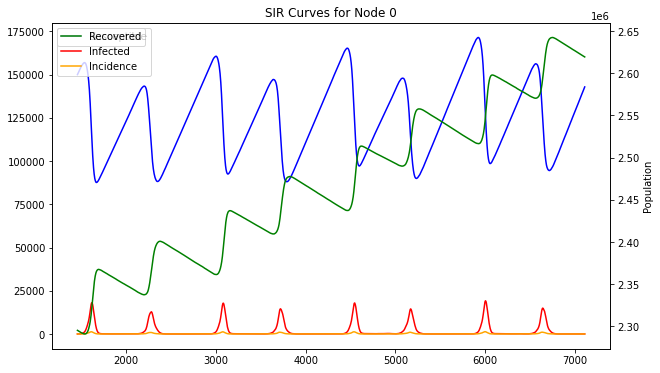

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_sir_curves(csv_file="simulation_output.csv", node_id=0):
    # Load data from CSV file
    df = pd.read_csv(csv_file)

    # Filter data for the specified node
    node_data = df[df['Node'] == node_id]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot SIR curves
    ax1.plot(node_data['Timestep'], node_data['Susceptible'], label='Susceptible', color='blue')
    ax1.plot(node_data['Timestep'], node_data['Infected'], label='Infected', color='red')
    ax1.plot(node_data['Timestep'], node_data['New Infections'], label='Incidence', color='orange')

    ax2 = ax1.twinx()
    ax2.plot(node_data['Timestep'], node_data['Recovered'], label='Recovered', color='green')
    ax2.set_ylabel('Recovered count')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Set plot labels and title
    plt.xlabel('Timestamp')
    plt.ylabel('Population')
    plt.title(f'SIR Curves for Node {node_id}')
    plt.legend()

    # Show the plot
    plt.show()

plot_sir_curves()

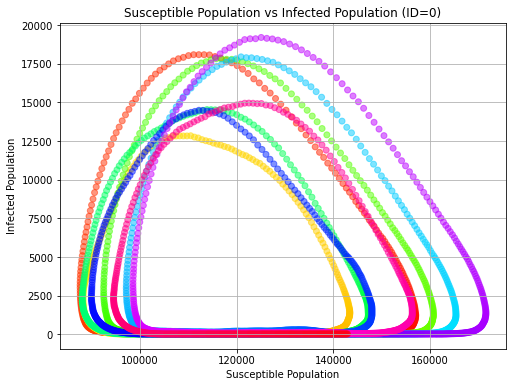

In [12]:
def plot_si_orbitals(
    csv_file = "simulation_output.csv", 
    burnin = 365*4,
    node_id = 0,
    normalize = False
):

    df = pd.read_csv(csv_file)
    df_filtered = df[df['Timestep'] > int(burnin)]
    df_filtered = df_filtered[df_filtered['Node'] == node_id]
    if normalize:
        total_population = df_filtered["Susceptible"] + df_filtered["Infected"] + df_filtered["Recovered"]
        df_filtered.loc[:, "Susceptible"] = df_filtered["Susceptible"] / total_population
        df_filtered.loc[:, "Infected"] = df_filtered["Infected"] / total_population
        label = "Fraction"
    else:
        df_filtered.loc[:, "Susceptible"] = df_filtered["Susceptible"]
        df_filtered.loc[:, "Infected"] = df_filtered["Infected"]
        label = "Population"

    # Step 3: Plot the Data
    plt.figure(figsize=(8, 6))
    colors=np.linspace(0, 1, len(df_filtered["Susceptible"]))
    plt.scatter(df_filtered["Susceptible"], df_filtered["Infected"], alpha=0.5, c=colors, cmap="hsv")
    plt.title(f"Susceptible {label} vs Infected {label} (ID={node_id})")
    plt.xlabel(f"Susceptible {label}")
    plt.ylabel(f"Infected {label}")
    plt.grid(True)
    plt.show()
    
plot_si_orbitals()

## Calibration

In [25]:
#TBD